# **Task 2**
## GRIP The spark Foundation 
### Retail - Data science and Business Analysis

#### Problem Statement: To Find out the weak areas where the store losses its income.

**Namadi Rakesh June_2022**

Importing all the necessary libraries to do the analysis on the datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltcc
import seaborn as sns

Data from Dataset SampleSuperstore.csv
(Provided by spark foundation)

In [ ]:
sam_data = pd.read_csv("/root/SampleSuperstore.csv")
sam_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Our dataset contains 9994 rows and 13 columns

In [ ]:
sam_data.shape

(9994, 13)

some aggregates of the dataset

In [ ]:
sam_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


To know the complete info about the dataset.


In [ ]:
sam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
sam_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
sam_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

As of now there is no null values in the dataset so that we can go through the further analysis of the data on the dataset.


In [ ]:
# Here is the sum of sales and profits

print('Sales:' ,sam_data['Sales'].sum())
print('Profit:' ,sam_data['Profit'].sum())

Sales: 2297200.8603000003
Profit: 286397.0217


To do the analysis we need to figure out the sales and profits of the store.
Every column is to be linked with this data

In [ ]:
# To check whether we have any duplicacy in  Dataset or not 

sam_data.duplicated().sum()

17

 Duplicate entries can ruin the split between train, validation and test sets in cases where identical entries are not all in the same set.This can lead to biased performance estimates that will lead to disappointing models in production

In [ ]:
# we need to drop the duplicates inorder to move with the further analysis

sam_data = sam_data.drop_duplicates()

After removing the dulicate values the dataset contains 9977 rows and 13 columns
out of (9994,13)

In [ ]:
sam_data.shape

(9977, 13)

Now we need to perform analysis on the data

I use to analysis this in various formats
1. Regional analysis
2. Custormer analysis
3. Product analysis
4. Top Products

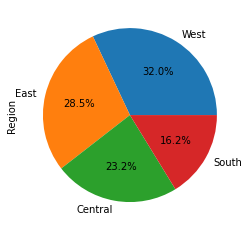

In [ ]:
# To check maximum transactions made region wise

sam_data.Region.value_counts().plot.pie(autopct="%.1f%%")
plt.show()

We need to check out the region wise transactions. It should be plot in pie chart for better understanding. Clearly we can see that west side (32%), East (28.5%) central (23.2%) south (16.2%) transactions done.

<function matplotlib.pyplot.show>

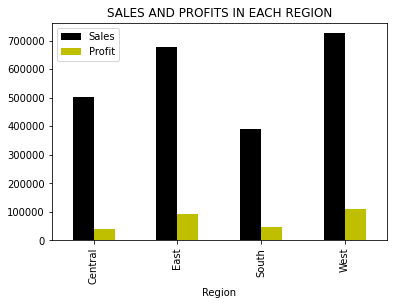

In [ ]:
sam_data.groupby('Region')['Sales','Profit'].sum().plot.bar(color='ky')
plt.title('SALES AND PROFITS IN EACH REGION')
plt.legend()
plt.show

Now the bar plot shows the regional wise data of sales and profits.
In west side sales is more and profit is more

whereas central have more sales with less profits

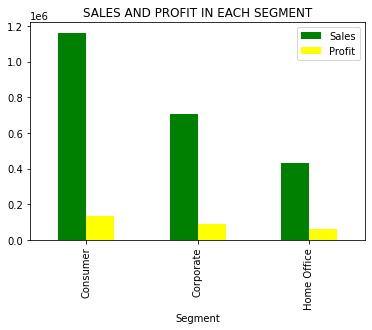

In [ ]:
# To check maximum Sales and Profit in each segment

sam_data.groupby('Segment')['Sales','Profit'].sum().plot.bar(color=['green','yellow'])
plt.title('SALES AND PROFIT IN EACH SEGMENT')
plt.legend()
plt.show()

In the dataset we have segments [Consumer, Corporate, Home office]

Again we need to gorup them with sales and profits


bar plot shows consumer segment holds nore sales and more profits


home office shows less among three

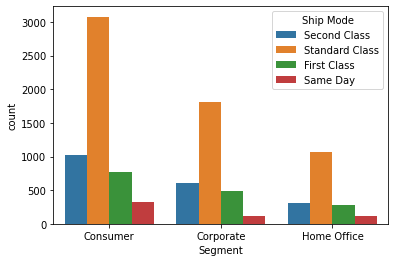

In [ ]:
sns.countplot(x='Segment' , hue='Ship Mode' , data=sam_data)
plt.show()

Countplot from seaborn library plots the data with segments and ship mode of the materials.

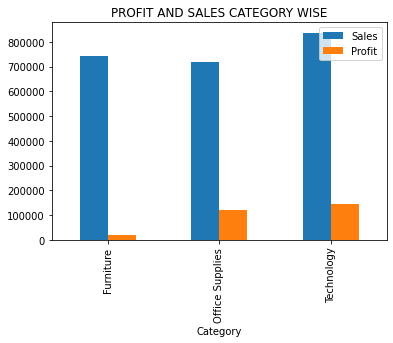

In [ ]:
sam_data.groupby('Category')['Sales','Profit'].sum().plot.bar()
plt.title('PROFIT AND SALES CATEGORY WISE')
plt.legend(loc = 1)
plt.show()

Category of the items is the major thing in the analysis.

So that, items are group into category and ploted with sales and profits.

Technology items have more sales and profits, whereas Furniture have more sales but low profits

we need to work hard to get more profits in it

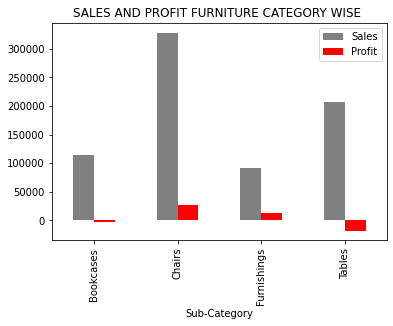

In [ ]:
sam_data[sam_data['Category'] == 'Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar(color = ['gray','red'])
plt.title('SALES AND PROFIT FURNITURE CATEGORY WISE ')
plt.legend(loc = 1)
plt.show()

 now we need to guess the problem behind the low profits in furniture category 

 to know that we need to plot the sub category values and their sales and profits

 Through the bar plot we clearly know that Tables and Bookcases produces loss to the stores

 Fumishings also shows low profits

What could be the reason for losses in tables and bookcases?

Yes, It may be the affect of discounts in that category.Let's see the discounts of that individual items

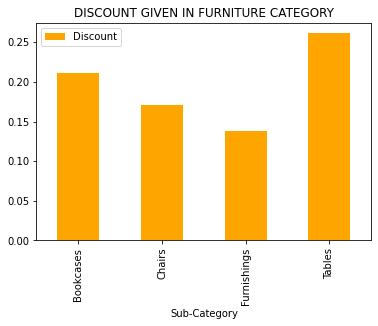

In [ ]:
sam_data[sam_data['Category'] == 'Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar(color =['Orange'])
plt.title('DISCOUNT GIVEN IN FURNITURE CATEGORY')
plt.legend(loc = 0)
plt.show()

Here Tables and Bookcases are sellings under huge discounts. So our store bearing losses in this category

In [ ]:
sam_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


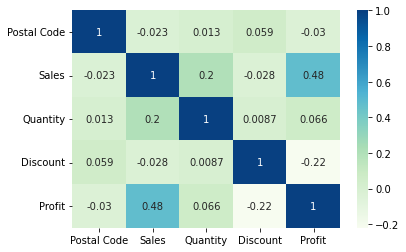

In [ ]:
sns.heatmap(sam_data.corr(),annot=True , cmap= 'GnBu')
plt.show()

Now this correlation graph shows that which region is getting more discounts.

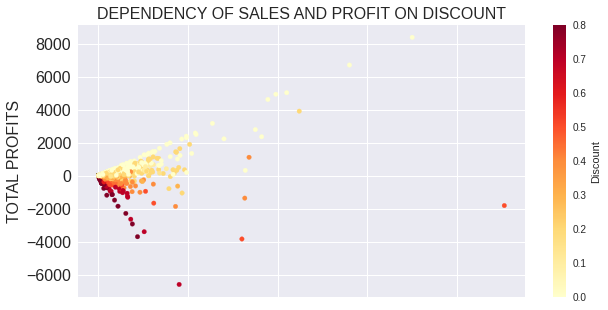

In [ ]:
plt.style.use('seaborn')
sam_data.plot(kind = 'scatter', figsize = (10,5) , x = 'Sales', y='Profit', c = 'Discount' , s = 20 , fontsize = 16 , colormap = 'YlOrRd')
plt.ylabel('TOTAL PROFITS', fontsize = 16)
plt.title('DEPENDENCY OF SALES AND PROFIT ON DISCOUNT' , fontsize = 16)
plt.show()

This Graph clearly showing that less discounts leads to more profits

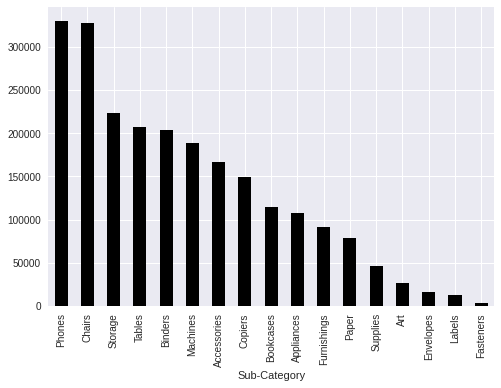

In [ ]:
sam_data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color = 'black')
plt.show()

In sub categories   [sales]

More sales
*   Phones
*   chairs

Less sales
*   Fasteners
*   Lables etc.



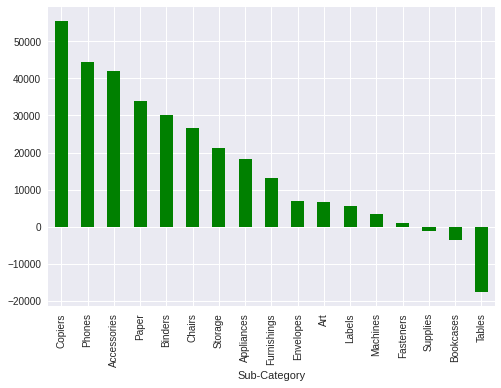

In [ ]:
sam_data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot.bar(color = 'green')
plt.show()

In sub categories [Profits]

More profits
*   Copiers
*   Phones
*   Accessories

Loss
*   Tables
*   Backcases
*   Slippers

# Outcomes

* West Region made MAX transactions
* Sales are MAX in west region
* Profits are MAX in west region
* Sales and Profits are MAX in consumer segment
* Pos Corr: Profit and sales
* Neg corr: Profit and discounts
* More profits with less discounts
* Furniture produces less profits to the store
* Tables, slippers and backcases gives loss
* copiers, phones and accessories produces more profits



# RESULT

By the analysis, we can conclude that weak area is furniture. we need to work on to get more profits to super store. In that tables and bookcases are under huge discounts. It need to reduce the discounts inorder to increase the profits for the store